In [1]:
!pip install statsmodels

In [2]:
!pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/15/aa/3f4c7bcee2057a76562a5b33ecbd199be08cdb4443a02e26bd2c3cf6fc39/pip-23.3.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 637.6 kB/s eta 0:00:000:00:01m eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1


In [3]:
# import libraries

import pandas as pd 
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [4]:
# load csv data to a dataframe

df = pd.read_csv('files/Advertising.csv', index_col = 0)
df.head(3)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3


In [5]:
df.shape

(200, 4)

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
# set a dependent and independent variable

x1 = df['TV']
x1.head()

1    230.1
2     44.5
3     17.2
4    151.5
5    180.8
Name: TV, dtype: float64

In [8]:
y = df['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [9]:
type(x1), type(y)

(pandas.core.series.Series, pandas.core.series.Series)

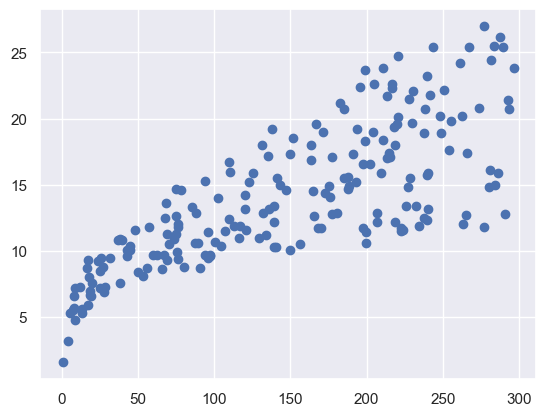

In [10]:
# explore data

plt.scatter(x1, y)

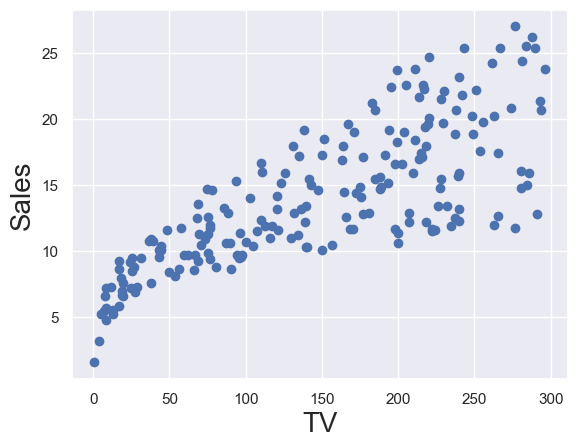

In [11]:
plt.scatter(x1, y)
plt.xlabel('TV', fontsize = 20)
plt.ylabel('Sales', fontsize = 20)
plt.show()

In [12]:
# regresion itself

x = sm.add_constant(x1)
x

,const,TV
1,1.0,230.1
2,1.0,44.5
3,1.0,17.2
4,1.0,151.5
5,1.0,180.8
...,...,...
196,1.0,38.2
197,1.0,94.2
198,1.0,177.0
199,1.0,283.6


In [13]:
results = sm.OLS(y, x).fit()
results

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           1.47e-42
Time:                        14:47:21   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
print(results.summary()) # easier to read

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           1.47e-42
Time:                        14:47:40   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

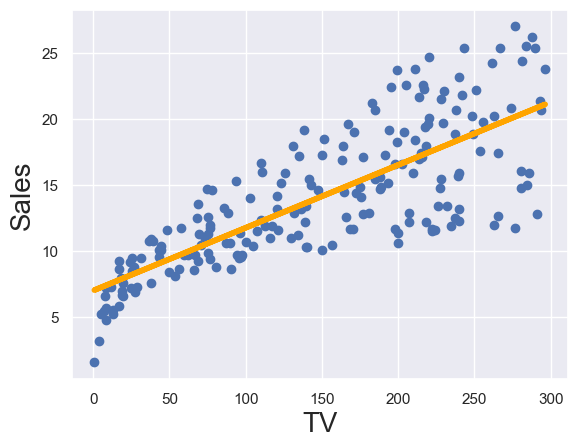

In [17]:
plt.scatter(x1, y)

y_hat = x1 * 0.0475 + 7.0326 # predicted values

fig = plt.plot(x1, y_hat, lw = 4, c = 'orange', label = 'regression line')

plt.xlabel('TV', fontsize = 20)
plt.ylabel('Sales', fontsize = 20)
plt.show()